# Adversarial Variational Optimization: Pythia benchmark

In [1]:
import torch
import hypothesis
import matplotlib.pyplot as plt

In [2]:
from hypothesis.benchmark.pythia import allocate_observations

theta_true = .5
resolution = 32
theta_true, observations = allocate_observations(theta_true, resolution=resolution)

/home/joeri/Anaconda/lib/python3.6/site-packages/pythiamill/mill.py:70: UserWarning: `seed` argument is not specified and Pythia options does not contain `Random:seed` options. This may result in duplicating samples.
  warnings.warn('`seed` argument is not specified and Pythia options does not contain `Random:seed` options. '


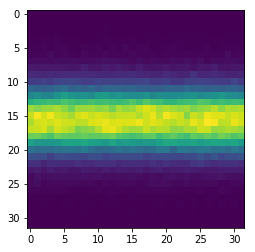

In [3]:
plt.imshow(observations.mean(dim=0).numpy())
plt.show()

## AVO

### Discriminator

In [4]:
class Discriminator(torch.nn.Module):
    
    def __init__(self):
        super(Discriminator, self).__init__()
        num_hidden = 300
        self.network = torch.nn.Sequential(
            torch.nn.Linear(resolution ** 2, num_hidden),
            torch.nn.PReLU(),
            torch.nn.Linear(num_hidden, num_hidden),
            torch.nn.PReLU(),
            torch.nn.Linear(num_hidden, num_hidden),
            torch.nn.PReLU(),
            torch.nn.Linear(num_hidden, num_hidden),
            torch.nn.PReLU(),
            torch.nn.Linear(num_hidden, num_hidden),
            torch.nn.PReLU(),
            torch.nn.Linear(num_hidden, num_hidden),
            torch.nn.PReLU(),
            torch.nn.Linear(num_hidden, num_hidden),
            torch.nn.PReLU(),
            torch.nn.Linear(num_hidden, num_hidden),
            torch.nn.PReLU(),
            torch.nn.Linear(num_hidden, num_hidden),
            torch.nn.PReLU(),
            torch.nn.Linear(num_hidden, 1),
            torch.nn.Sigmoid())
        
    def forward(self, x):
        x = x.view(-1, resolution ** 2)
        y = self.network(x)
        
        return y

In [5]:
def allocate_discriminator():
    return Discriminator()

### Simulator

In [6]:
from hypothesis.benchmark.pythia import PythiaDetectorOffsetSimulator as Simulator

simulator = Simulator(resolution=resolution)

/home/joeri/Anaconda/lib/python3.6/site-packages/pythiamill/mill.py:70: UserWarning: `seed` argument is not specified and Pythia options does not contain `Random:seed` options. This may result in duplicating samples.
  warnings.warn('`seed` argument is not specified and Pythia options does not contain `Random:seed` options. '


### Proposal

In [7]:
from hypothesis.proposal import NormalProposal

proposal = NormalProposal()

### Inference

In [8]:
from hypothesis.inference import AdversarialVariationalOptimization

avo = AdversarialVariationalOptimization(simulator, allocate_discriminator(), proposal)

In [9]:
proposal = avo.infer(observations, steps=10000)

/home/joeri/Anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  if __name__ == '__main__':


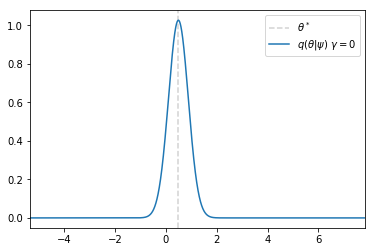

In [15]:
import matplotlib.mlab as mlab
import numpy as np

mean = proposal._mu.item()
sigma = proposal._sigma.item()
true = theta_true.item()
x = np.linspace(mean - 15 * sigma, mean + 15 * sigma + 1.5, 5000)
plt.axvline(true, linestyle="--", c="lightgray", label=r"${\theta^*}$")
plt.plot(x, mlab.normpdf(x, mean, sigma), label=r"$q({\theta}|{\psi})\ \gamma = 0$")
plt.xlim([np.min(x), np.max(x)])
plt.grid(False)
plt.legend()
plt.show()